# Seattle Weather Project

##### This project explores precipitation trends in Seattle, WA and New York City, NY to understand seasonal rainfall difference.

## Import libraries

In [128]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

## Load the data

##### Load the Seattle data set

In [129]:
df_seattle = pd.read_csv(
    '/Users/jimmynam/Documents/Academics/SU/DATA_5100/Project/weather/data/seattle_rain.csv')

##### Load the New York City data set

In [130]:
df_nyc = pd.read_csv(
    '/Users/jimmynam/Documents/Academics/SU/DATA_5100/Project/weather/data/nyc_rain.csv')

## Data Inspection

In [131]:
df_seattle.head(10)

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN
5,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/6/18,NaN,NaN,0.57,NaN,NaN,NaN,NaN
6,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/7/18,NaN,NaN,0.23,NaN,NaN,NaN,NaN
7,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/8/18,NaN,NaN,0.41,NaN,NaN,NaN,NaN
8,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",3/12/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
9,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",3/13/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN


In [132]:
df_nyc.head(10)

,STATION,NAME,DATE,PRCP,SNOW,SNWD
0,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-01,0.00,0.0,0.0
1,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-02,0.00,0.0,0.0
2,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-03,0.00,0.0,0.0
3,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-04,0.49,8.0,1.2
4,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-05,0.00,0.0,7.9
5,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-06,0.00,0.0,7.9
6,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-07,0.00,0.0,7.9
7,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-08,0.02,0.0,7.9
8,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-09,0.00,0.0,7.1
9,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-10,0.00,0.0,5.1


In [133]:
df_seattle.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD',
       'WESD', 'WESF'],
      dtype='object')

In [134]:
df_nyc.columns

Index(['STATION', 'NAME', 'DATE', 'PRCP', 'SNOW', 'SNWD'], dtype='object')

In [135]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


In [136]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1826 non-null   object 
 1   NAME     1826 non-null   object 
 2   DATE     1826 non-null   object 
 3   PRCP     1826 non-null   float64
 4   SNOW     1826 non-null   float64
 5   SNWD     1826 non-null   float64
dtypes: float64(3), object(3)
memory usage: 85.7+ KB


In [137]:
print(df_seattle.shape)

(1658, 10)


In [138]:
print(df_nyc.shape)

(1826, 6)


#### Examine the `STATION` column

In [139]:
df_seattle['STATION'].unique()

array(['US1WAKG0225'], dtype=object)

In [140]:
df_nyc['STATION'].unique()

array(['USW00094789'], dtype=object)

In [141]:
df_nyc['STATION'].nunique()

1

In [142]:
df_seattle['STATION'].nunique()

1

In [143]:
df_seattle['DATE']

0         1/1/18
1         1/2/18
2         1/3/18
3         1/4/18
4         1/5/18
          ...   
1653    12/27/22
1654    12/28/22
1655    12/29/22
1656    12/30/22
1657    12/31/22
Name: DATE, Length: 1658, dtype: object

In [144]:
df_nyc['DATE']

0       2018-01-01
1       2018-01-02
2       2018-01-03
3       2018-01-04
4       2018-01-05
           ...    
1821    2022-12-27
1822    2022-12-28
1823    2022-12-29
1824    2022-12-30
1825    2022-12-31
Name: DATE, Length: 1826, dtype: object

In [210]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'], format='%Y-%m-%d')

In [146]:
df_nyc['DATE'] = pd.to_datetime(df_nyc['DATE'])

In [147]:
df_seattle['DATE']

0      2018-01-01
1      2018-01-02
2      2018-01-03
3      2018-01-04
4      2018-01-05
          ...    
1653   2022-12-27
1654   2022-12-28
1655   2022-12-29
1656   2022-12-30
1657   2022-12-31
Name: DATE, Length: 1658, dtype: datetime64[ns]

In [148]:
df_nyc['DATE']

0      2018-01-01
1      2018-01-02
2      2018-01-03
3      2018-01-04
4      2018-01-05
          ...    
1821   2022-12-27
1822   2022-12-28
1823   2022-12-29
1824   2022-12-30
1825   2022-12-31
Name: DATE, Length: 1826, dtype: datetime64[ns]

In [149]:
df_seattle['DATE'].agg(['min', 'max'])

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

In [151]:
df_nyc['DATE'].agg(['min', 'max'])

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

Plot the daily precipitation data for Seattle.

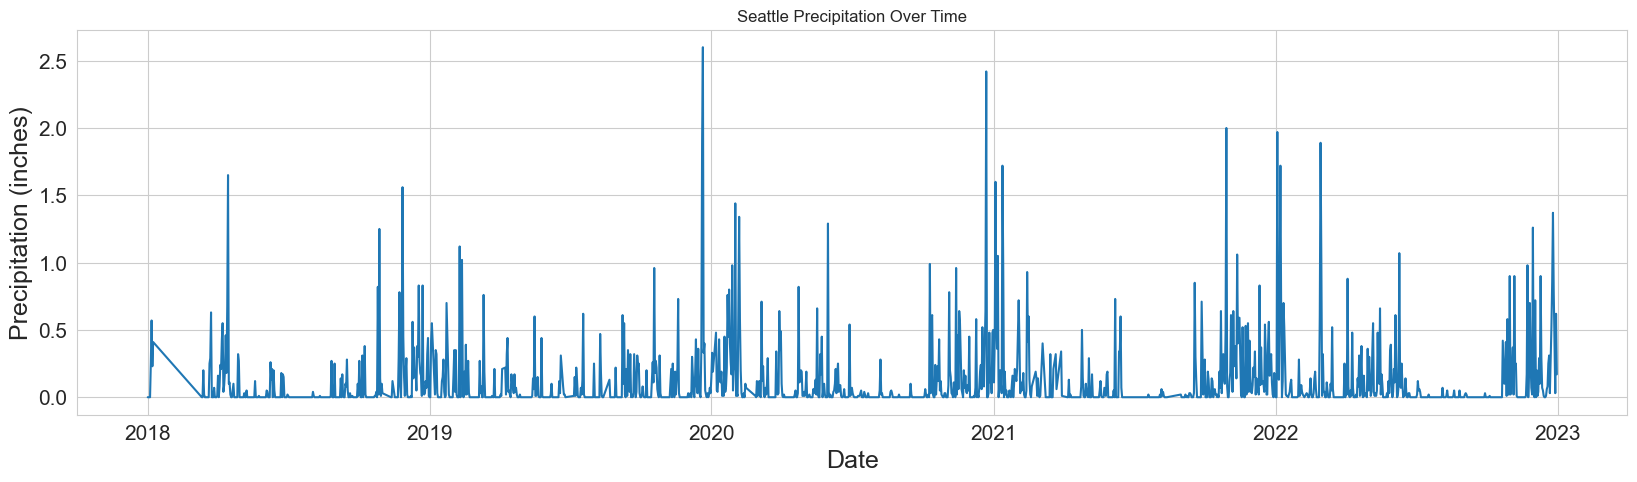

In [152]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=df_seattle, x='DATE', y='PRCP').set_title('Seattle Precipitation Over Time')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

##### Plot the daily precipitation data for New York.

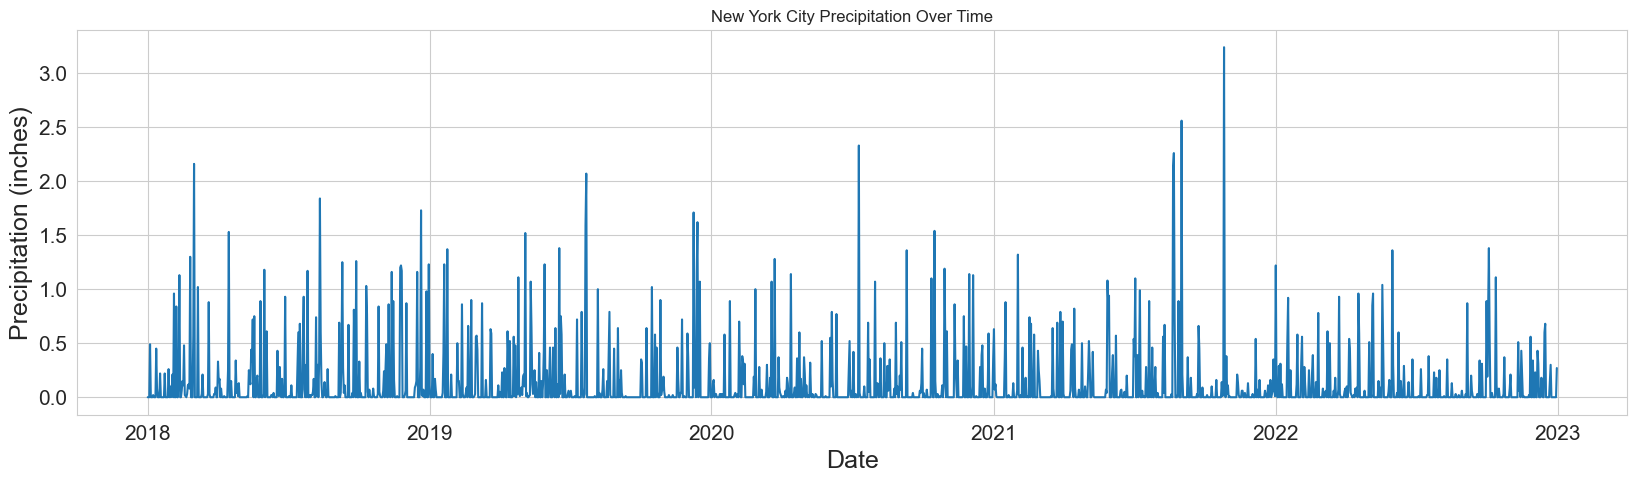

In [153]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=df_nyc, x='DATE', y='PRCP').set_title('New York City Precipitation Over Time')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

### Select multiple columns

In [154]:
df_seattle[['STATION', 'DATE', 'PRCP']]

,STATION,DATE,PRCP
0,US1WAKG0225,2018-01-01,0.00
1,US1WAKG0225,2018-01-02,0.00
2,US1WAKG0225,2018-01-03,0.00
3,US1WAKG0225,2018-01-04,0.00
4,US1WAKG0225,2018-01-05,0.25
...,...,...,...
1653,US1WAKG0225,2022-12-27,0.78
1654,US1WAKG0225,2022-12-28,0.40
1655,US1WAKG0225,2022-12-29,0.03
1656,US1WAKG0225,2022-12-30,0.62


Select the rows where `PRCP` is greater than 0.

In [155]:
df_seattle['PRCP'] > 0

0       False
1       False
2       False
3       False
4        True
        ...  
1653     True
1654     True
1655     True
1656     True
1657     True
Name: PRCP, Length: 1658, dtype: bool

In [156]:
sum(df_seattle['PRCP'] > 0)

841

In [157]:
df_seattle[df_seattle['PRCP'] > 0]

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,NaN,NaN,0.25,NaN,NaN,NaN,NaN
5,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-06,NaN,NaN,0.57,NaN,NaN,NaN,NaN
6,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-07,NaN,NaN,0.23,NaN,NaN,NaN,NaN
7,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-08,NaN,NaN,0.41,NaN,NaN,NaN,NaN
10,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-03-14,NaN,NaN,0.20,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1653,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-27,NaN,NaN,0.78,NaN,NaN,NaN,NaN
1654,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-28,NaN,NaN,0.40,NaN,NaN,NaN,NaN
1655,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-29,NaN,NaN,0.03,NaN,NaN,NaN,NaN
1656,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-30,NaN,NaN,0.62,NaN,NaN,NaN,NaN


##### Select the rows where the precipitation is between 0.5 and 0.75 inches.

In [158]:
df_seattle[(df_seattle['PRCP'] >= 0.5) & (df_seattle['PRCP'] <= 0.75)]

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
5,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-06,NaN,NaN,0.57,NaN,NaN,NaN,NaN
20,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-03-24,NaN,NaN,0.63,NaN,NaN,NaN,NaN
35,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-04-08,NaN,NaN,0.55,NaN,NaN,NaN,NaN
41,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-04-14,NaN,NaN,0.68,NaN,NaN,NaN,NaN
271,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-12-10,NaN,NaN,0.56,NaN,NaN,NaN,NaN
296,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-01-04,NaN,NaN,0.55,NaN,NaN,NaN,NaN
313,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-01-23,NaN,NaN,0.70,NaN,NaN,NaN,NaN
331,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-02-11,NaN,NaN,0.70,4.0,NaN,NaN,NaN
419,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-05-17,NaN,NaN,0.60,NaN,NaN,NaN,NaN
472,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-07-19,NaN,NaN,0.62,NaN,NaN,NaN,NaN


##### Limit the New York data to 2018 and beyond.

In [159]:
df_nyc['DATE'] >= '2018-01-01'

0       True
1       True
2       True
3       True
4       True
        ... 
1821    True
1822    True
1823    True
1824    True
1825    True
Name: DATE, Length: 1826, dtype: bool

In [160]:
df_nyc = df_nyc.loc[df_nyc['DATE'] >= '2018-01-01']

In [161]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1826 entries, 0 to 1825
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1826 non-null   object        
 1   NAME     1826 non-null   object        
 2   DATE     1826 non-null   datetime64[ns]
 3   PRCP     1826 non-null   float64       
 4   SNOW     1826 non-null   float64       
 5   SNWD     1826 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 99.9+ KB


## Join data frames keeping `DATE` and `PRCP` columns

In [162]:
df = df_nyc[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'PRCP']], on='DATE', how='outer')

In [163]:
df.head()

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.00,0.00
1,2018-01-02,0.00,0.00
2,2018-01-03,0.00,0.00
3,2018-01-04,0.49,0.00
4,2018-01-05,0.00,0.25


In [164]:
df.shape

(1826, 3)

In [165]:
df

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.00,0.00
1,2018-01-02,0.00,0.00
2,2018-01-03,0.00,0.00
3,2018-01-04,0.49,0.00
4,2018-01-05,0.00,0.25
...,...,...,...
1821,2022-12-27,0.00,0.78
1822,2022-12-28,0.00,0.40
1823,2022-12-29,0.00,0.03
1824,2022-12-30,0.00,0.62


In [166]:
df = pd.melt(df, id_vars='DATE', var_name='city', value_name='precipitation')

In [167]:
df.head()

,DATE,city,precipitation
0,2018-01-01,PRCP_x,0.00
1,2018-01-02,PRCP_x,0.00
2,2018-01-03,PRCP_x,0.00
3,2018-01-04,PRCP_x,0.49
4,2018-01-05,PRCP_x,0.00


In [168]:
df.tail()

,DATE,city,precipitation
3647,2022-12-27,PRCP_y,0.78
3648,2022-12-28,PRCP_y,0.40
3649,2022-12-29,PRCP_y,0.03
3650,2022-12-30,PRCP_y,0.62
3651,2022-12-31,PRCP_y,0.17


Rename the city values 'NYC' and 'SEA'

In [169]:
df.loc[df['city'] == 'PRCP_x', 'city'] = 'NYC'

In [170]:
df.loc[df['city'] == 'PRCP_y', 'city'] = 'SEA'

In [171]:
df.head()

,DATE,city,precipitation
0,2018-01-01,NYC,0.00
1,2018-01-02,NYC,0.00
2,2018-01-03,NYC,0.00
3,2018-01-04,NYC,0.49
4,2018-01-05,NYC,0.00


In [172]:
df.tail()

,DATE,city,precipitation
3647,2022-12-27,SEA,0.78
3648,2022-12-28,SEA,0.40
3649,2022-12-29,SEA,0.03
3650,2022-12-30,SEA,0.62
3651,2022-12-31,SEA,0.17


In [173]:
df = df.rename(columns={'DATE': 'date'})

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3652 non-null   datetime64[ns]
 1   city           3652 non-null   object        
 2   precipitation  3462 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 85.7+ KB


In [175]:
df.notna().sum()

date             3652
city             3652
precipitation    3462
dtype: int64

##### Determine the number of null values in each column.

In [176]:
df.isna().sum()

date               0
city               0
precipitation    190
dtype: int64

##### Determine the number of null precipitation values for Seattle and New York.

In [177]:
df.loc[df['city'] == 'SEA', 'precipitation'].isna().sum()

np.int64(190)

In [178]:
df.loc[df['city'] == 'NYC', 'precipitation'].isna().sum()

np.int64(0)

In [179]:
df['day_of_year'] = pd.DatetimeIndex(df['date']).day_of_year

##### Compute the mean precipitation for each day in Seattle, averaged across years.

In [180]:
mean_day_precipitation = df.loc[
    df['city'] == 'SEA',
    ['precipitation', 'day_of_year']
].groupby(
    'day_of_year'
).mean()

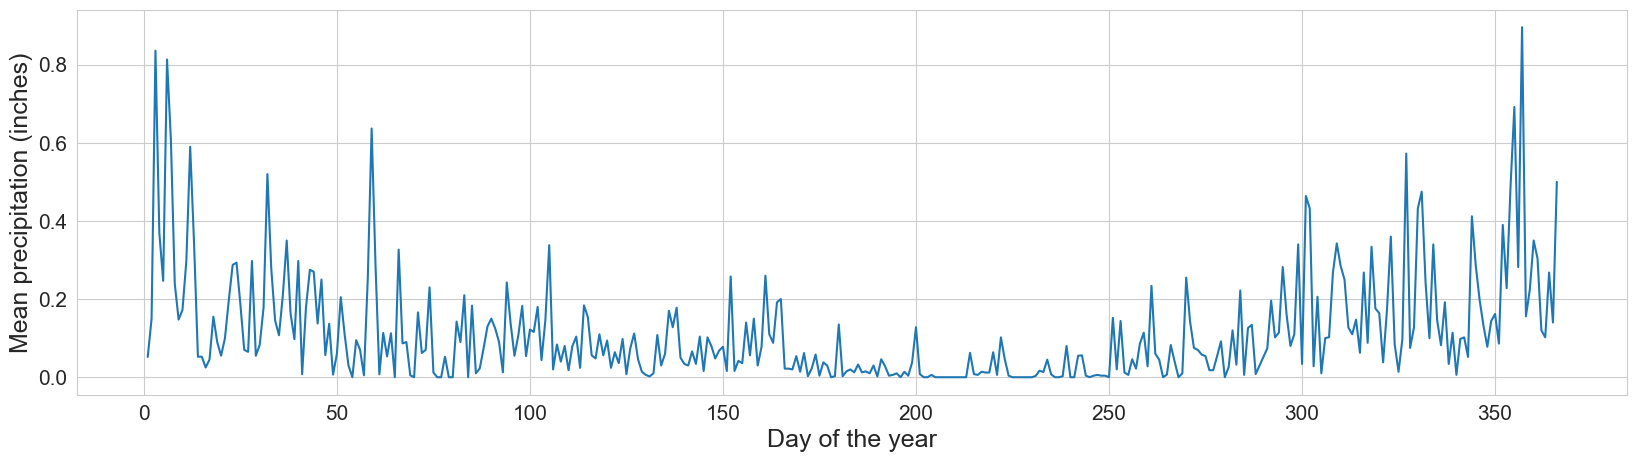

In [181]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=mean_day_precipitation, x='day_of_year', y='precipitation')

plt.xlabel('Day of the year', fontsize=18)
plt.ylabel('Mean precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

##### Get the index of each row where precipitation is missing.

In [182]:
indices = np.where(df['precipitation'].isna() == True)[0]

In [183]:
indices

array([1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844,
       1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855,
       1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866,
       1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877,
       1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888,
       1889, 1890, 1891, 1892, 1893, 1894, 1895, 2090, 2131, 2132, 2133,
       2134, 2135, 2136, 2137, 2138, 2139, 2140, 2195, 2196, 2197, 2214,
       2215, 2244, 2245, 2246, 2247, 2248, 2249, 2286, 2287, 2288, 2362,
       2363, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377,
       2417, 2418, 2419, 2420, 2421, 2422, 2423, 2517, 2518, 2519, 2520,
       2521, 2522, 2523, 2524, 2559, 2560, 2561, 2602, 2603, 2604, 2605,
       2606, 2607, 2608, 2609, 2610, 2611, 2612, 2818, 2819, 2820, 2821,
       2822, 2823, 2824, 2825, 2826, 2827, 2972, 2973, 2974, 2975, 2983,
       2984, 2986, 2987, 2988, 3000, 3001, 3004, 30

##### Replace each missing value with the mean on that day

In [184]:
for index in indices:
    df.loc[index, 'precipitation'] = mean_day_precipitation.loc[df.loc[index,'day_of_year']].values[0]

##### Check for missing values in the data frame

In [185]:
df.isna().sum()

date             0
city             0
precipitation    0
day_of_year      0
dtype: int64

Numerical Summaries for precipitation in each city

In [186]:
df[['city', 'precipitation']].groupby('city').describe()

precipitation                                               
             count     mean       std  min  25%   50%   75%   max
city                                                             
NYC         1826.0  0.12569  0.304574  0.0  0.0  0.00  0.06  3.24
SEA         1826.0  0.11327  0.240516  0.0  0.0  0.01  0.12  2.60

Mean precipitation values averaged over year

In [187]:
df[['city', 'precipitation']].groupby('city').mean()

,precipitation
city,
NYC,0.12569
SEA,0.11327


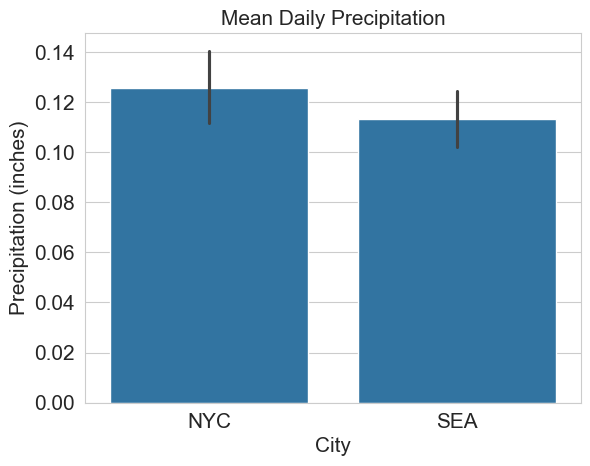

In [188]:
sns.barplot(data=df, x='city', y='precipitation')

plt.ylabel('Precipitation (inches)', fontsize=15)
plt.xlabel('City', fontsize=15)
plt.title('Mean Daily Precipitation', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

### Precipitation by Month

In [189]:
df['month'] = pd.DatetimeIndex(df['date']).month

In [190]:
df.head()

,date,city,precipitation,day_of_year,month
0,2018-01-01,NYC,0.00,1,1
1,2018-01-02,NYC,0.00,2,1
2,2018-01-03,NYC,0.00,3,1
3,2018-01-04,NYC,0.49,4,1
4,2018-01-05,NYC,0.00,5,1


In [191]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [192]:
sns.barplot

<function seaborn.categorical.barplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, units=None, weights=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, hue_norm=None, width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', capsize=0, err_kws=None, ci=<deprecated>, errcolor=<deprecated>, errwidth=<deprecated>, ax=None, **kwargs)>

## Precipitation amounts each month using boxplots

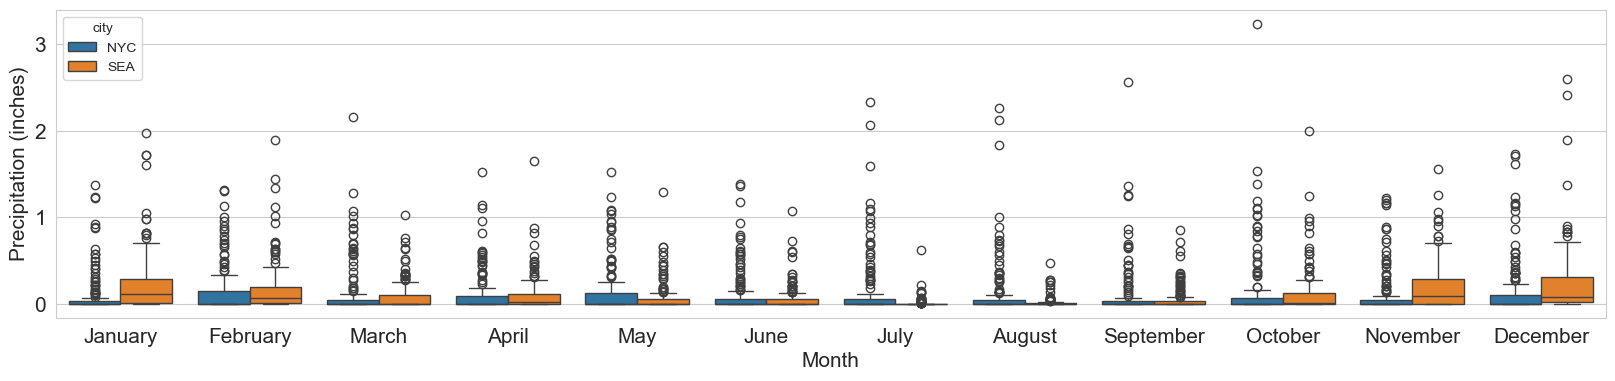

In [193]:
plt.figure(figsize=(20, 4))

sns.boxplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

# Get more month names and set as x-axis tick labels
import calendar
month_names = list(calendar.month_name[1:]) # month names
plt.xticks(ticks=range(12), labels=month_names) # Set x-axis ticks to month names

plt.show()

Horizontal view of the plot

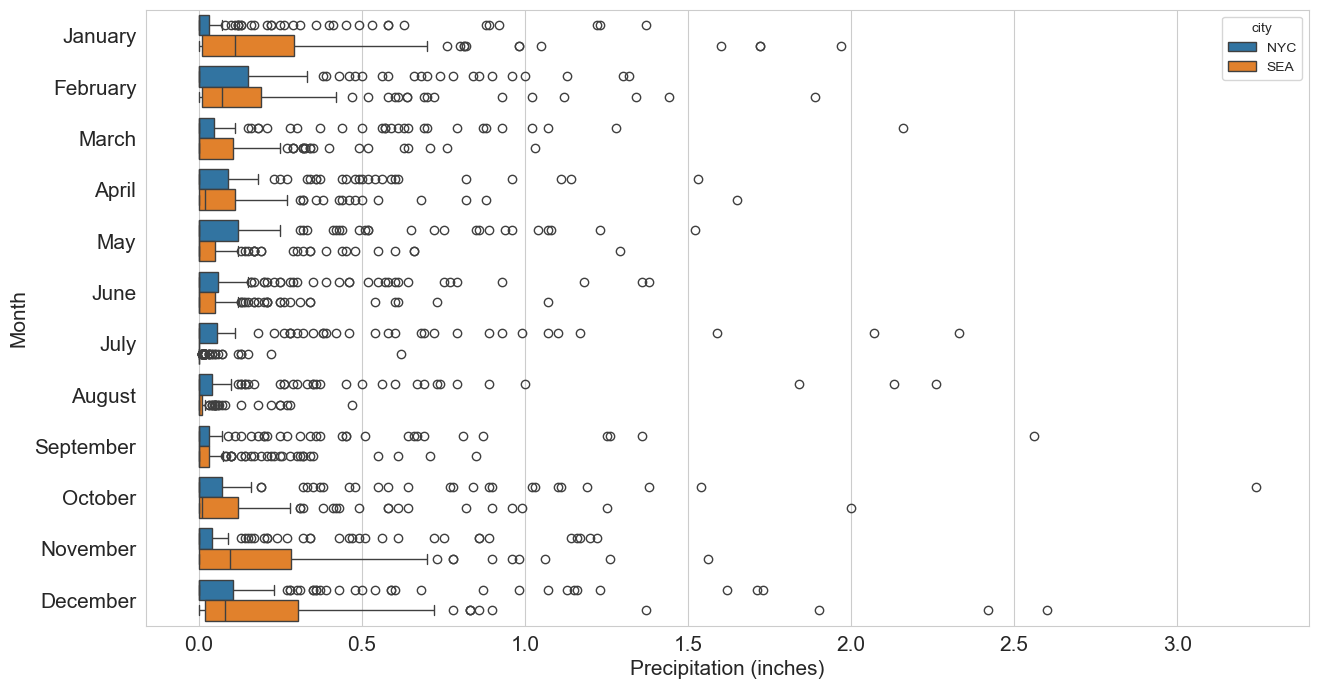

In [194]:
plt.figure(figsize=(15, 8))

sns.boxplot(data=df, x='precipitation', y='month', hue='city', orient='h')

plt.ylabel('Month', fontsize=15)
plt.xlabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.yticks(ticks=range(12), labels=month_names)

plt.show()

Zoomed in precipitation axis

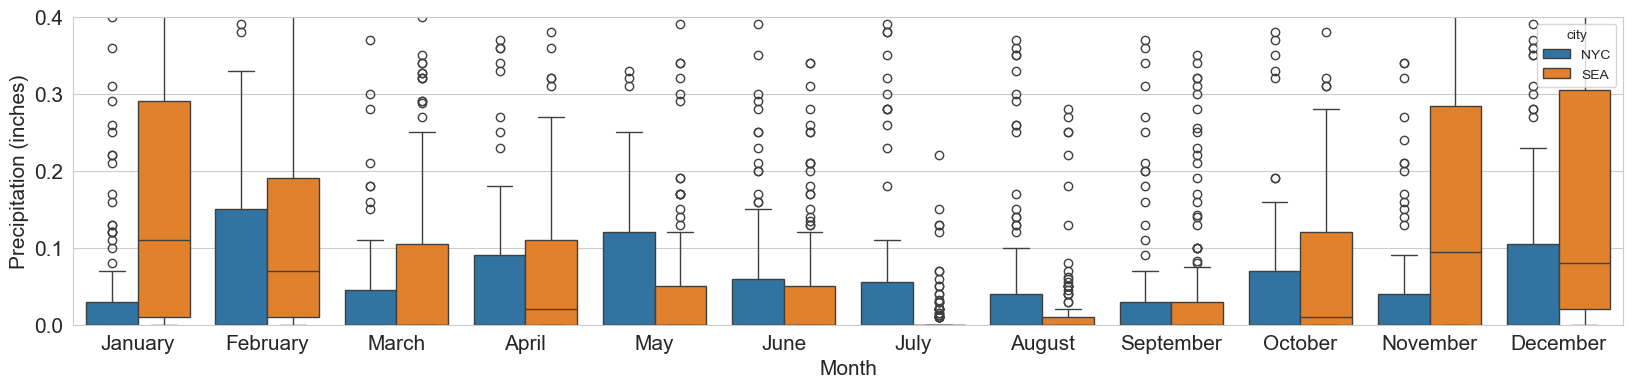

In [195]:
plt.figure(figsize=(20, 4))

sns.boxplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.xticks(ticks=range(12), labels=month_names)

plt.ylim(0, 0.4)

plt.show()

Mean precipitation each month

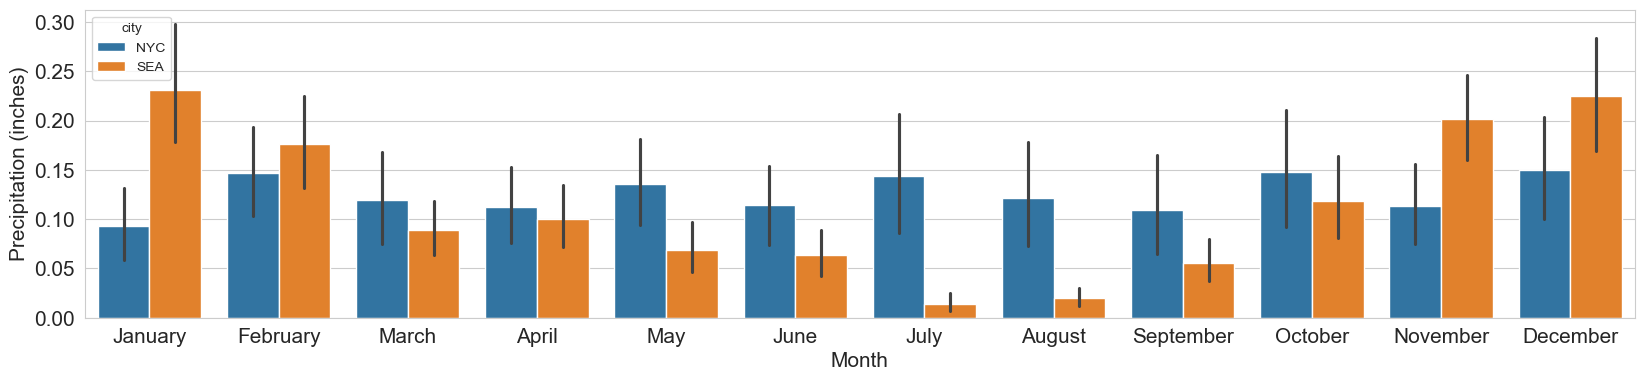

In [196]:
plt.figure(figsize=(20, 4))

sns.barplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.xticks(ticks=range(12), labels=month_names)

plt.show()

Mean Precipitatino for each month for each city

In [197]:
df[['month', 'precipitation', 'city']].groupby(['city', 'month']).mean()

precipitation
city month               
NYC  1           0.093097
     2           0.147163
     3           0.119355
     4           0.112333
     5           0.135613
     6           0.114600
     7           0.143871
     8           0.121871
     9           0.109000
     10          0.148065
     11          0.113867
     12          0.149677
SEA  1           0.230742
     2           0.176472
     3           0.089075
     4           0.100483
     5           0.069161
     6           0.063167
     7           0.013984
     8           0.019995
     9           0.055622
     10          0.118452
     11          0.201867
     12          0.224903

any precipitation on that day

In [198]:
df['any_precipitation'] = df['precipitation'] > 0

In [199]:
df.head()

,date,city,precipitation,day_of_year,month,any_precipitation
0,2018-01-01,NYC,0.00,1,1,False
1,2018-01-02,NYC,0.00,2,1,False
2,2018-01-03,NYC,0.00,3,1,False
3,2018-01-04,NYC,0.49,4,1,True
4,2018-01-05,NYC,0.00,5,1,False


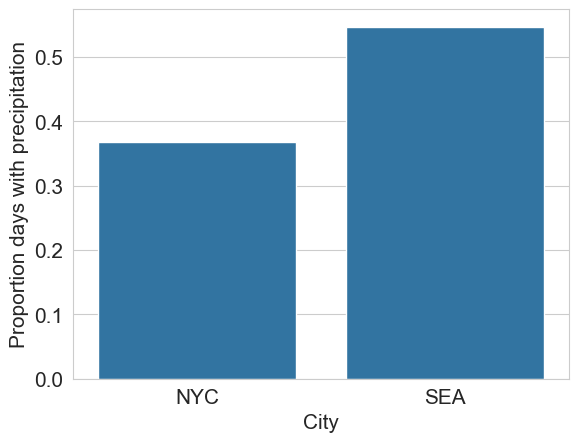

In [200]:
sns.barplot(data=df, x='city', y='any_precipitation', errorbar=None)

plt.xlabel('City', fontsize=15)
plt.ylabel('Proportion days with precipitation', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

Proportion of days with precipitation each month

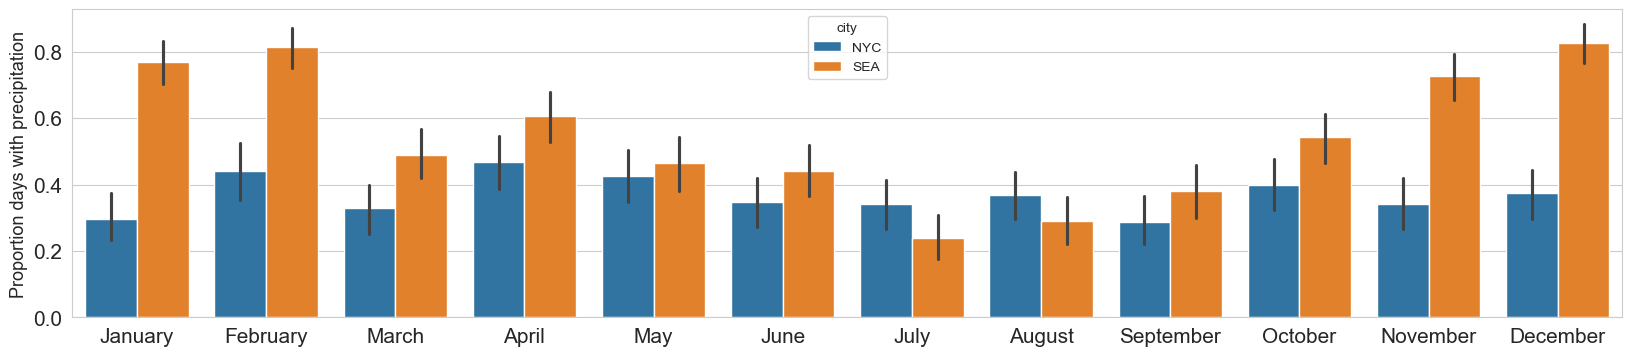

In [201]:
plt.figure(figsize=(20, 4))

sns.barplot(data=df, x='month', y='any_precipitation', hue='city')

plt.xlabel(None)
plt.ylabel('Proportion days with precipitation', fontsize=13)
plt.xticks(ticks=range(12), labels=month_names)
plt.tick_params(labelsize=15)
 
plt.show()

# Statistical Test/Modeling

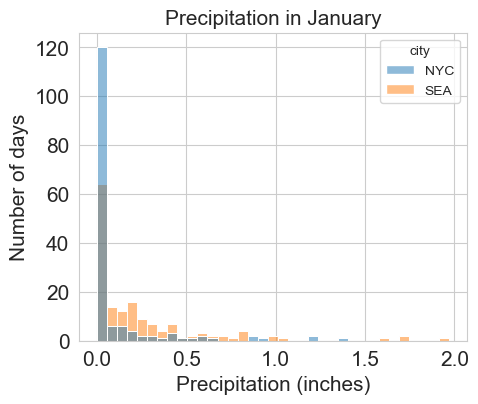

In [202]:
plt.figure(figsize=(5, 4))

sns.histplot(data=df.loc[df['month'] == 1], x='precipitation', hue='city')

plt.xlabel('Precipitation (inches)', fontsize=15)
plt.ylabel('Number of days', fontsize=15)
plt.title('Precipitation in January', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

Analysis

In [203]:
from scipy import stats

In [204]:
significance_level = 0.05
significantly_different = np.zeros(12)

# Perform t-test for each month
for month in range(1, 13):
    # Get precipitation data for Seattle and NYC for the current month
    sea_data = df.loc[(df['city'] == 'SEA') & (df['month'] == month), 'precipitation']
    nyc_data = df.loc[(df['city'] == 'NYC') & (df['month'] == month), 'precipitation']

    t_statistic, p_value = stats.ttest_ind(sea_data, nyc_data, equal_var=False)

    if p_value < significance_level:
        significantly_different[month-1] = 1

    print(f"Month {month}:")
    print(f"    t-statistic = {t_statistic:.2f}")
    print(f"    p_value t test = {p_value:.3f}")
    print("-" * 20)

Month 1:
    t-statistic = 4.11
    p_value t test = 0.000
--------------------
Month 2:
    t-statistic = 0.85
    p_value t test = 0.397
--------------------
Month 3:
    t-statistic = -1.10
    p_value t test = 0.272
--------------------
Month 4:
    t-statistic = -0.46
    p_value t test = 0.645
--------------------
Month 5:
    t-statistic = -2.51
    p_value t test = 0.013
--------------------
Month 6:
    t-statistic = -2.13
    p_value t test = 0.034
--------------------
Month 7:
    t-statistic = -4.42
    p_value t test = 0.000
--------------------
Month 8:
    t-statistic = -3.71
    p_value t test = 0.000
--------------------
Month 9:
    t-statistic = -1.92
    p_value t test = 0.057
--------------------
Month 10:
    t-statistic = -0.79
    p_value t test = 0.431
--------------------
Month 11:
    t-statistic = 2.79
    p_value t test = 0.006
--------------------
Month 12:
    t-statistic = 1.85
    p_value t test = 0.065
--------------------


Plot with significant differences

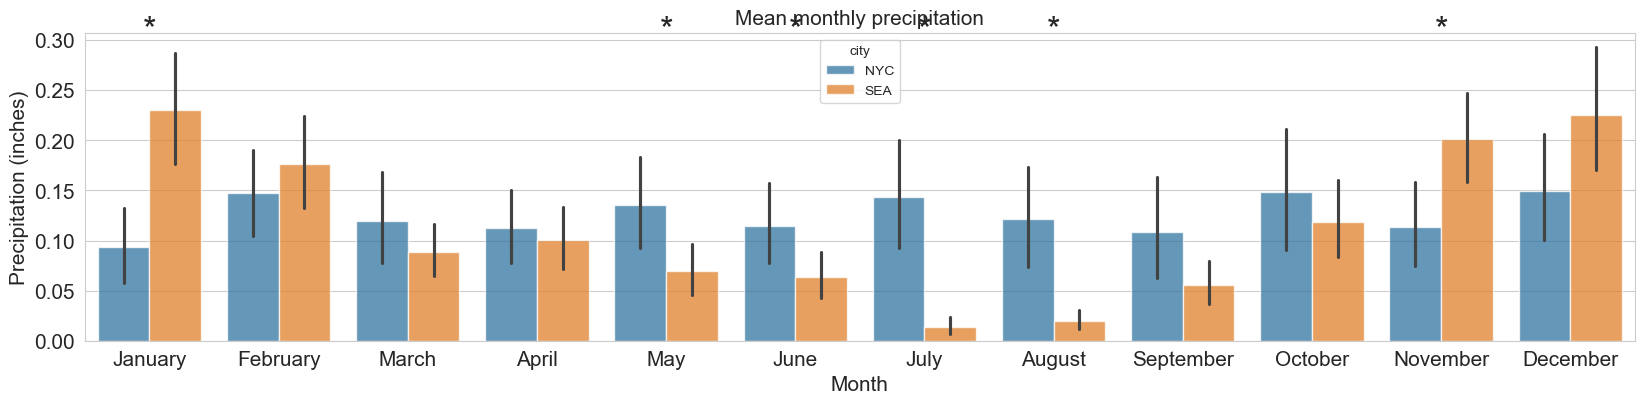

In [205]:
plt.figure(figsize=(20, 4))

sns.barplot(data=df, x='month', y='precipitation', hue='city', alpha=0.75)

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)
plt.title('Mean monthly precipitation', fontsize=15)

plt.tick_params(labelsize=15)

plt.xticks(ticks=range(12), labels=month_names)

# Add stars for significantly different months
for month in range(12):
    if significantly_different[month] == 1:

        # Add a star
        plt.text(month, 0.3, '*', ha='center', fontsize=25)

plt.show()

Perform statistical test for difference in the proportion of days with any precipitation each month between the cities

In [206]:
from statsmodels.stats.proportion import proportions_ztest

significance_level = 0.05
significantly_different_proportion = np.zeros(12)

# Perform t-test for each month
for month in range(1, 13):

    # Create a contingency table for Seattle and NYC for the current month:
    contingency_table = pd.crosstab(
        df.loc[df['month'] == month, 'city'], df.loc[df['month'] == month, 'any_precipitation']
    )

    # Calculate the number of True values (days with precipitation) for each city
    days_with_precipitation = contingency_table[True]

    # Calculate the total number of days for each city
    total_counts = contingency_table.sum(axis=1)

    # Hypothesis test
    zstat, p_value = proportions_ztest(
        count=days_with_precipitation, nobs=total_counts, alternative='two-sided'
    )

    if p_value < significance_level:
        significantly_different_proportion[month-1] = 1

    print(f"Month {month}:")
    print(f"    z-statistic = {t_statistic:.2f}")
    print(f"    p_value = {p_value:.3f}")
    print("-" * 20)

Month 1:
    z-statistic = 1.85
    p_value = 0.000
--------------------
Month 2:
    z-statistic = 1.85
    p_value = 0.000
--------------------
Month 3:
    z-statistic = 1.85
    p_value = 0.004
--------------------
Month 4:
    z-statistic = 1.85
    p_value = 0.015
--------------------
Month 5:
    z-statistic = 1.85
    p_value = 0.493
--------------------
Month 6:
    z-statistic = 1.85
    p_value = 0.098
--------------------
Month 7:
    z-statistic = 1.85
    p_value = 0.045
--------------------
Month 8:
    z-statistic = 1.85
    p_value = 0.147
--------------------
Month 9:
    z-statistic = 1.85
    p_value = 0.086
--------------------
Month 10:
    z-statistic = 1.85
    p_value = 0.012
--------------------
Month 11:
    z-statistic = 1.85
    p_value = 0.000
--------------------
Month 12:
    z-statistic = 1.85
    p_value = 0.000
--------------------


In [207]:
contingency_table = pd.crosstab(
        df.loc[df['month'] == 1, 'city'], df.loc[df['month'] == 1, 'any_precipitation']
    )

contingency_table

any_precipitation,False,True
city,,
NYC,109,46
SEA,36,119


Plot proportion of days with any precipitation each month with a star for significant differences

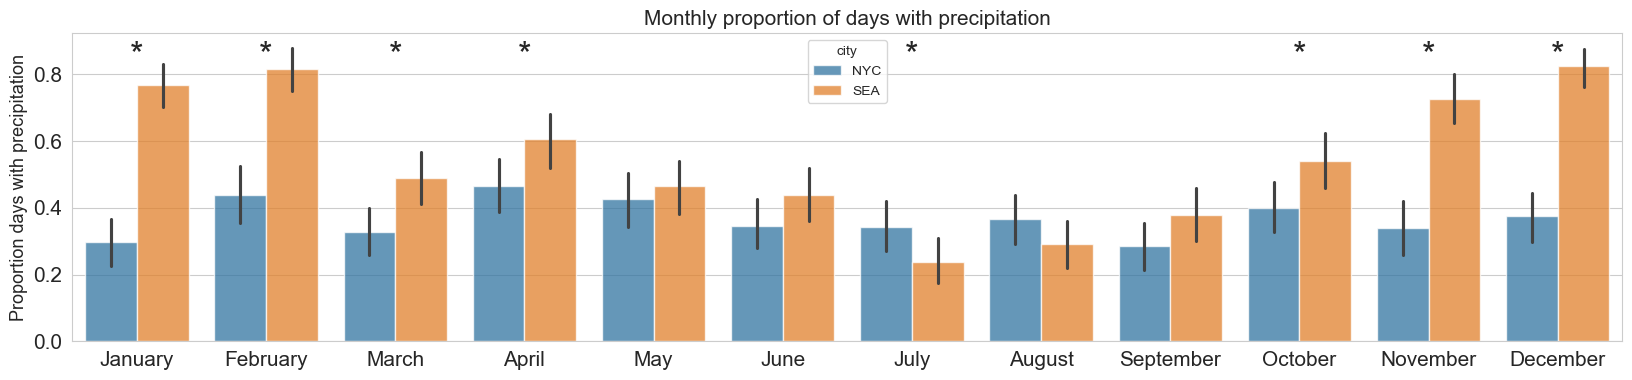

In [208]:
plt.figure(figsize=(20, 4))

sns.barplot(data=df, x='month', y='any_precipitation', hue='city', alpha=0.75)

plt.xlabel(None)
plt.ylabel('Proportion days with precipitation', fontsize=13)
plt.title('Monthly proportion of days with precipitation', fontsize=15)

plt.xticks(ticks=range(12), labels=month_names)
plt.tick_params(labelsize=15)

# Add stars for significantly different months
for month in range(12):
    if significantly_different_proportion[month] == 1:

        # Add a star
        plt.text(month, 0.825, '*', ha='center', fontsize=25)

plt.show()

## Export the clean .csv file

In [209]:
df.to_csv('clean_seattle_newyork_weather.csv', encoding='utf-8-sig', index=False)